In [87]:
import math
import collections
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json

%matplotlib inline


from nba_api.stats.endpoints import playercareerstats

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

import pickle
import seaborn as sns
   

In [88]:
with open('mainScoringDF.pkl', 'rb') as f:
    mainDF = pickle.load(f) # deserialize using load()

In [89]:
mainDF


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980-81,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980-81,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980-81,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980-81,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980-81,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021-22,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021-22,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021-22,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021-22,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


<Axes: >

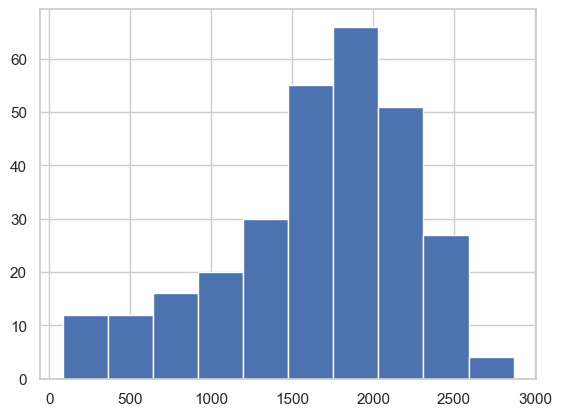

In [90]:
mainDF['PTS'].hist()

In [91]:
#sns.histplot(data=mainDF, x = 'GP' > 20,y='PTS')


In [92]:
#faresClean = titanic_clean.loc[titanic_clean['Fare'] < 400]
mainDFCLEAN =mainDF.loc[mainDF['GP'] > 40]

<Axes: xlabel='GP', ylabel='PTS'>

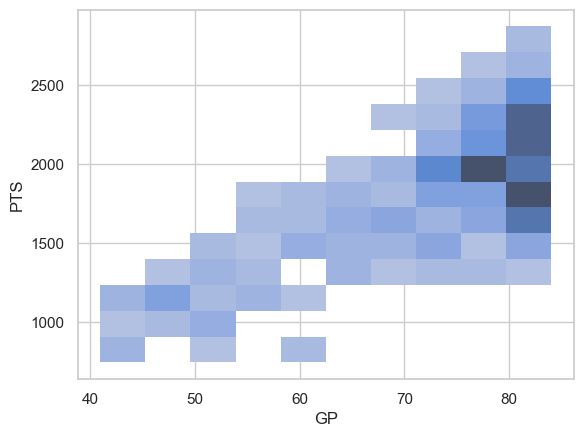

In [93]:
sns.histplot(data=mainDFCLEAN, x = 'GP',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

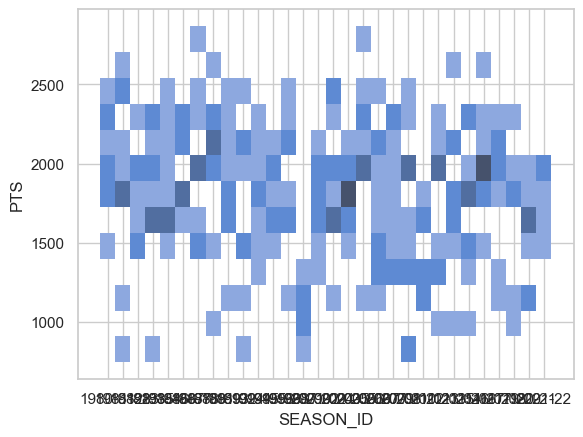

In [94]:
sns.histplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

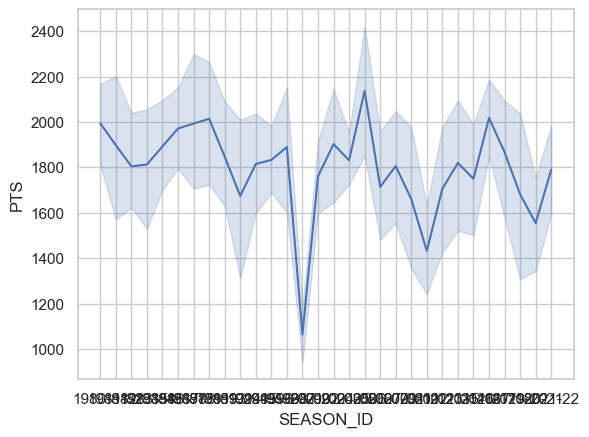

In [95]:
sns.lineplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


In [96]:
# clears lockout sesaon

mainDFCLEANnolockout =mainDF.loc[mainDF['PTS'] > 1200]


In [97]:
#with open('mainDFCLEANnolockout.pkl','wb') as f: #opens file
#    pickle.dump(mainDFCLEANnolockout,f)
#with open('mainDFCLEAN.pkl','wb') as f: #opens file
#    pickle.dump(mainDFCLEAN,f)

<Axes: >

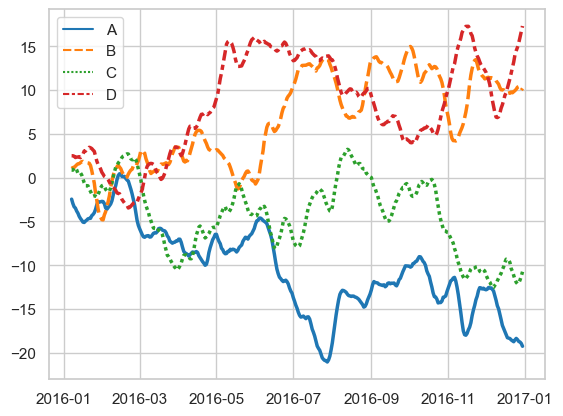

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [99]:
mainDF.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [100]:
data = mainDFCLEANnolockout[["SEASON_ID", "PTS", "AST", "REB"]]


In [101]:
data

,SEASON_ID,PTS,AST,REB
4,1980-81,2221,260,419
6,1980-81,2222,141,1180
4,1980-81,2014,364,657
11,1980-81,2095,272,821
4,1980-81,1749,158,676
...,...,...,...,...
12,2021-22,1630,404,335
8,2021-22,2002,388,778
6,2021-22,1822,329,342
7,2021-22,1447,370,716


<Axes: >

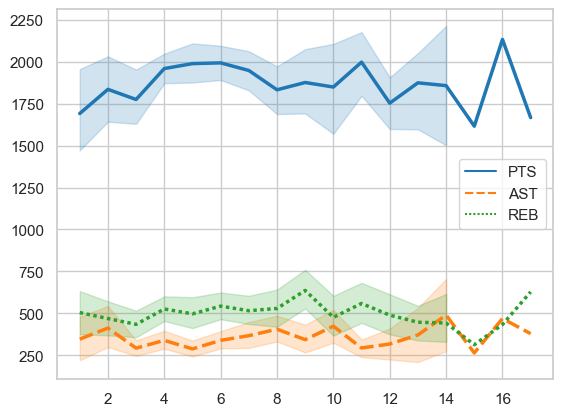

In [102]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

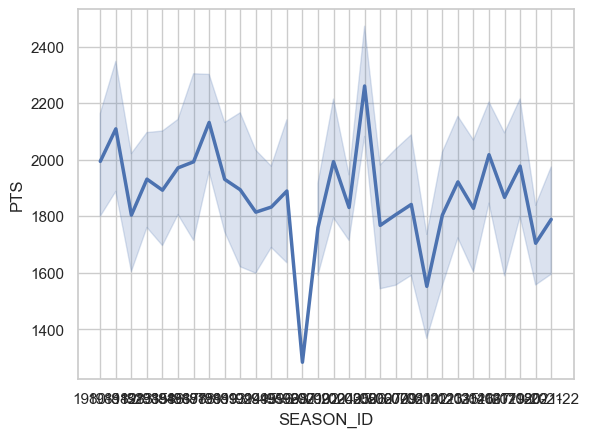

In [103]:
sns.lineplot(data=data,linewidth=2.5, x='SEASON_ID',y='PTS')


In [104]:
mainDF.dtypes

Player_Name           object
PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                   float64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                    int64
AST                    int64
STL                  float64
BLK                  float64
TOV                  float64
PF                     int64
PTS                    int64
dtype: object

In [105]:
mainDF['SEASON_ID'][0:4]
mainDF1=mainDF

In [106]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('str')


In [ ]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('str')


In [107]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1980-81','1980')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1981-82','1981')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1982-83','1982')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1983-84','1983')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1984-85','1984')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1985-86','1985')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1986-87','1986')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1987-88','1987')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1988-89','1988')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1989-90','1989')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021-22,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021-22,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021-22,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021-22,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


In [108]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1990-91','1990')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1991-92','1991')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1992-93','1992')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1993-94','1993')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1994-95','1994')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1995-96','1995')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1996-97','1996')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1997-98','1997')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1998-99','1998')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('1999-00','1999')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021-22,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021-22,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021-22,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021-22,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


In [109]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2000-01','2000')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2001-02','2001')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2002-03','2002')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2003-04','2003')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2004-05','2004')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2005-06','2005')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2006-07','2006')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2007-08','2007')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2008-09','2008')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2009-10','2009')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021-22,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021-22,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021-22,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021-22,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


In [112]:
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2010-11','2010')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2011-12','2011')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2012-13','2012')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2013-14','2013')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2014-15','2014')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2015-16','2015')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2016-17','2016')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2017-18','2017')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2018-19','2018')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2019-20','2019')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2020-21','2020')
mainDF1['SEASON_ID'] = mainDF1['SEASON_ID'].str.replace('2021-22','2021')
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

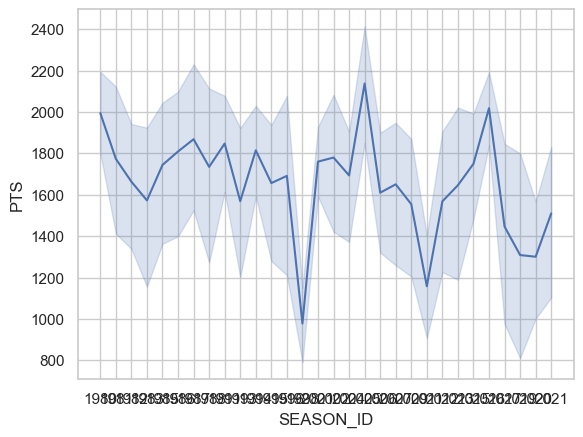

In [114]:
sns.lineplot(data=mainDF1, x = 'SEASON_ID',y='PTS')


In [111]:
# create a list of our conditions
conditions = [(),(),(),()]

# create a list of the values we want to assign for each condition
values = ['tier_4', 'tier_3', 'tier_2', 'tier_1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()


TypeError: invalid entry 0 in condlist: should be boolean ndarray

In [115]:
#with open('mainDFstrYEARS.pkl','wb') as f: #opens file
#    pickle.dump(mainDF1,f)

In [116]:
mainDF1['SEASON_ID']=mainDF1['SEASON_ID'].astype('int64')

In [117]:
mainDF1

,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


In [125]:
# create a list of our conditions
conditions = [(mainDF1['SEASON_ID'] < 1990),
              (mainDF1['SEASON_ID'] >= 1990) & (mainDF1['SEASON_ID'] <= 1999),
              (mainDF1['SEASON_ID'] >= 2000) & (mainDF1['SEASON_ID'] <= 2009),
              (mainDF1['SEASON_ID'] >= 2010)]

# create a list of the values we want to assign for each condition
values = ['80s', '90s', '00s', '10s']

# create a new column and use np.select to assign values to it using our lists as arguments
mainDF1['Decade'] = np.select(conditions, values)

# display updated DataFrame
mainDF1.head()


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Decade
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,126.0,293.0,419,260,94.0,56.0,251.0,212,2221,80s
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222,80s
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,244.0,413.0,657,364,173.0,147.0,266.0,233,2014,80s
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,197.0,624.0,821,272,59.0,228.0,249.0,244,2095,80s
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,229.0,447.0,676,158,83.0,53.0,130.0,249,1749,80s


In [126]:

with open('mainDfDecades.pkl','wb') as f: #opens file
    pickle.dump(mainDF1,f)

<Axes: xlabel='Decade', ylabel='PTS'>

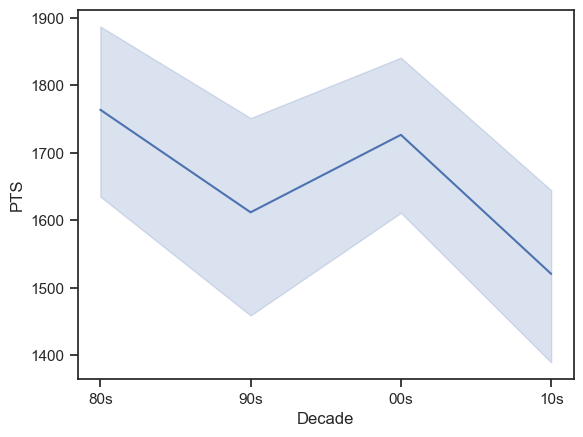

In [169]:

sns.lineplot(data=mainDF1, x = 'Decade',y='PTS')


In [128]:
# create a list of our conditions
conditions = [(mainDF1['SEASON_ID'] >= 1980) & (mainDF1['SEASON_ID'] <= 1985),
              (mainDF1['SEASON_ID'] >= 1986) & (mainDF1['SEASON_ID'] <= 1990),
              (mainDF1['SEASON_ID'] >= 1990) & (mainDF1['SEASON_ID'] <= 1995),
              (mainDF1['SEASON_ID'] >= 1996) & (mainDF1['SEASON_ID'] <= 2000),
              (mainDF1['SEASON_ID'] >= 2001) & (mainDF1['SEASON_ID'] <= 2005),
              (mainDF1['SEASON_ID'] >= 2006) & (mainDF1['SEASON_ID'] <= 2010),
              (mainDF1['SEASON_ID'] >= 2011) & (mainDF1['SEASON_ID'] <= 2015),
              (mainDF1['SEASON_ID'] >= 2016)]

# create a list of the values we want to assign for each condition
values = ['80-85','86-90','91-95','96-00','01-05','06-10','11-15','16-21']

# create a new column and use np.select to assign values to it using our lists as arguments
mainDF1['YearGroupsFives'] = np.select(conditions, values)

# display updated DataFrame
mainDF1.head()


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Decade,YearGroupsFives
4,George Gervin,76804,1980,00,1610612759,SAN,29.0,82,NaN,2765.0,...,293.0,419,260,94.0,56.0,251.0,212,2221,80s,80-85
6,Moses Malone,77449,1980,00,1610612745,HOU,26.0,80,80.0,3245.0,...,706.0,1180,141,83.0,150.0,308.0,223,2222,80s,80-85
4,Julius Erving,76681,1980,00,1610612755,PHL,31.0,82,NaN,2874.0,...,413.0,657,364,173.0,147.0,266.0,233,2014,80s,80-85
11,Kareem Abdul-Jabbar,76003,1980,00,1610612747,LAL,34.0,80,80.0,2976.0,...,624.0,821,272,59.0,228.0,249.0,244,2095,80s,80-85
4,Dan Issel,77097,1980,00,1610612743,DEN,32.0,80,NaN,2641.0,...,447.0,676,158,83.0,53.0,130.0,249,1749,80s,80-85


<Axes: xlabel='YearGroupsFives', ylabel='PTS'>

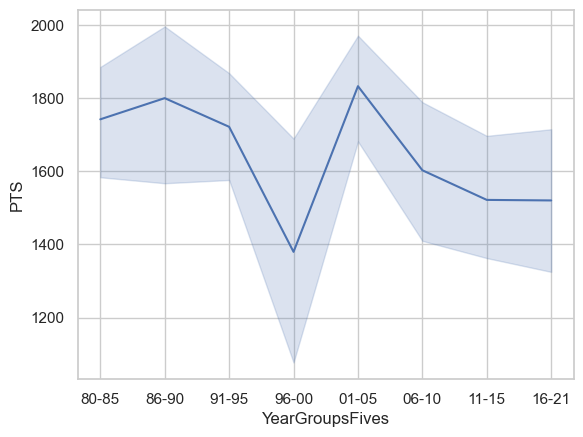

In [129]:
sns.lineplot(data=mainDF1, x = 'YearGroupsFives',y='PTS')


In [136]:
#or
with open('scoringAllByYearClean.pkl', 'rb') as f:
    poop = pickle.load(f) # deserialize using load()

In [151]:
mainDF1.columns

Index(['Player_Name', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Decade',
       'YearGroupsFives'],
      dtype='object')

In [178]:
mainDFDecade = mainDF1[['Decade','PTS','REB','AST','PLAYER_AGE','Player_Name']]

In [173]:
mainDFDecade

,Decade,PTS,REB,AST,PLAYER_AGE
4,80s,2221,419,260,29.0
6,80s,2222,1180,141,26.0
4,80s,2014,657,364,31.0
11,80s,2095,821,272,34.0
4,80s,1749,676,158,32.0
...,...,...,...,...,...
9,10s,928,189,265,29.0
8,10s,2002,778,388,27.0
6,10s,1822,342,329,25.0
7,10s,1447,716,370,27.0


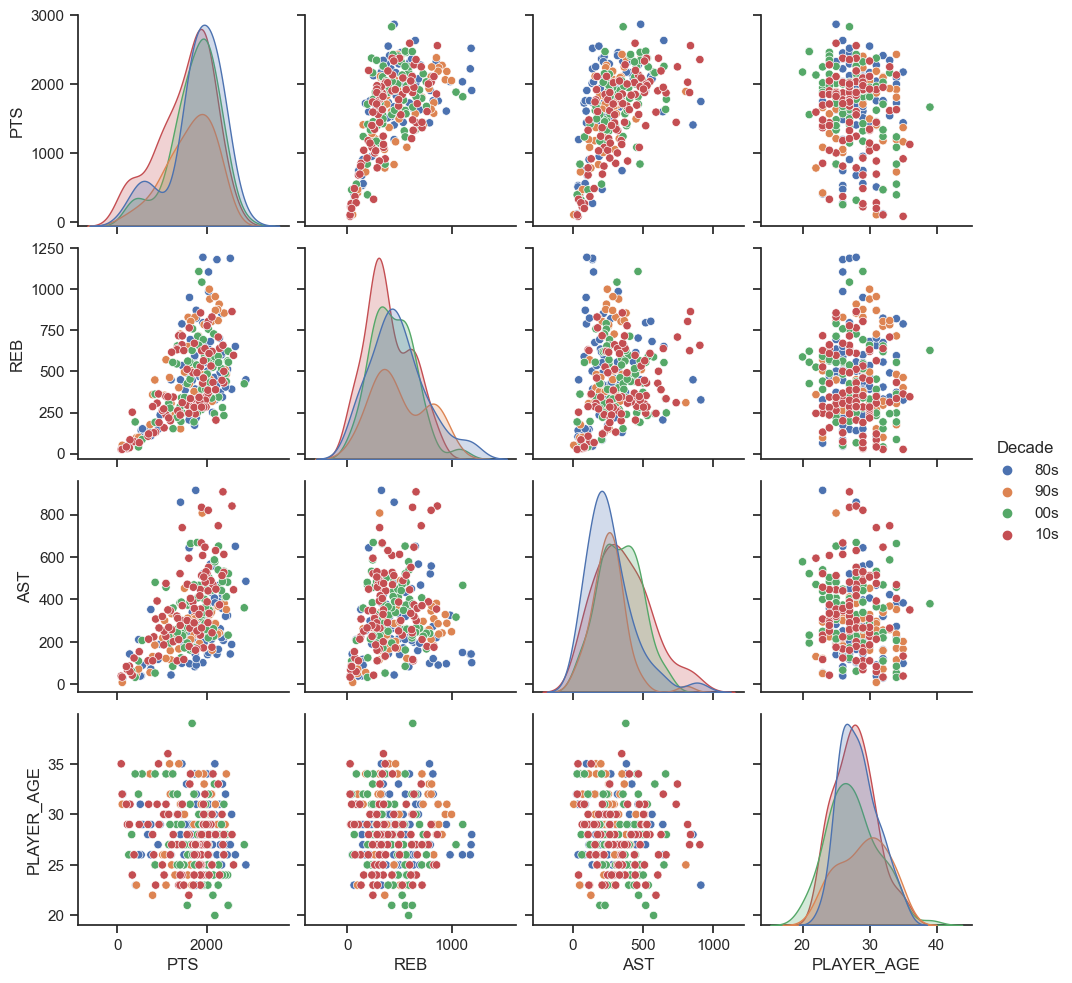

In [172]:
sns.pairplot(mainDFDecade, hue="Decade")
